# Automated data cleaning for chest Xrays with cleanX, example code 
Work by Candace Makeda Moore, MD, Oleg Sivokon, Andrew Murphy 
Please note this workflow is incomplete at present, 5/26/2021

## Libraries and environments

Import libraries:

In [1]:
# get the very latest cleanX off the github!
!pip uninstall -y cleanX
!pip install git+https://github.com/drcandacemakedamoore/cleanX.git


Found existing installation: cleanX 0.0.9
Uninstalling cleanX-0.0.9:
  Successfully uninstalled cleanX-0.0.9
  Cloning https://github.com/drcandacemakedamoore/cleanX.git to c:\users\makeda\appdata\local\temp\pip-req-build-seruf45d


  Running command git clone -q https://github.com/drcandacemakedamoore/cleanX.git 'C:\Users\makeda\AppData\Local\Temp\pip-req-build-seruf45d'


In [2]:
# libraries
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os 

import shutil
import PIL
from PIL import Image, ImageOps
# import math
# import filecmp
# import tesserocr
# from tesserocr import PyTessBaseAPI
# from filecmp import cmp
# from pathlib import Path
# import re
import cleanX as cx
import makedalytics as ma

Expose original author environment:

Expose original author environment:
This cell is a locked cell with my environment when this notebook was created:
System Platform: Windows 10
Packages:
absl-py @ file:///D:/bld/absl-py_1606235631785/work
aiohttp @ file:///D:/bld/aiohttp_1610358782056/work
argon2-cffi @ file:///D:/bld/argon2-cffi_1605217174718/work
astor @ file:///home/conda/feedstock_root/build_artifacts/astor_1593610464257/work
astunparse @ file:///home/conda/feedstock_root/build_artifacts/astunparse_1610696312422/work
async-generator==1.10
async-timeout==3.0.1
atomicwrites==1.4.0
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1605083924122/work
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache==1.6.1
beautifulsoup4 @ file:///home/linux1/recipes/ci/beautifulsoup4_1610988766420/work
bleach @ file:///home/conda/feedstock_root/build_artifacts/bleach_1611678357911/work
blinker==1.4
Bottleneck @ file:///D:/bld/bottleneck_1611195784589/work
cachetools @ file:///home/conda/feedstock_root/build_artifacts/cachetools_1611555765219/work
certifi==2020.12.5
cffi @ file:///D:/bld/cffi_1606601427219/work
chardet @ file:///D:/bld/chardet_1602255574834/work
cleanx==0.0.9
click==7.1.2
cmarkgfm==0.4.2
colorama @ file:///home/conda/feedstock_root/build_artifacts/colorama_1602866480661/work
conda==4.10.1
conda-build==3.21.4
conda-package-handling @ file:///C:/ci/conda-package-handling_1603018162806/work
covid-model-seiir-pipeline==0.1.0
covid-shared==1.0.47
cryptography @ file:///D:/bld/cryptography_1610338853236/work
cycler==0.10.0
decorator==4.4.2
defusedxml==0.6.0
dill @ file:///tmp/build/80754af9/dill_1605066453875/work
docutils==0.16
entrypoints @ file:///home/conda/feedstock_root/build_artifacts/entrypoints_1605121927639/work/dist/entrypoints-0.3-py2.py3-none-any.whl
filelock @ file:///home/linux1/recipes/ci/filelock_1610993975404/work
future==0.18.2
gast==0.3.3
glob2 @ file:///home/linux1/recipes/ci/glob2_1610991677669/work
google-auth @ file:///home/conda/feedstock_root/build_artifacts/google-auth_1608136875028/work
google-auth-oauthlib==0.4.1
google-pasta==0.2.0
googleapis-common-protos @ file:///C:/ci/googleapis-common-protos-feedstock_1600455733359/work
grpcio @ file:///D:/bld/grpcio_1610588756173/work
h5py @ file:///D:/bld/h5py_1602551956383/work
idna @ file:///home/conda/feedstock_root/build_artifacts/idna_1593328102638/work
importlib-metadata==3.10.1
iniconfig==1.1.1
ipykernel @ file:///C:/ci/ipykernel_1596208728219/work/dist/ipykernel-5.3.4-py3-none-any.whl
ipython==7.0.1
ipython-genutils==0.2.0
ipywidgets @ file:///tmp/build/80754af9/ipywidgets_1610481889018/work
jedi==0.17.0
Jinja2==2.11.2
joblib @ file:///tmp/build/80754af9/joblib_1607970656719/work
jsonschema @ file:///home/conda/feedstock_root/build_artifacts/jsonschema_1602551949684/work
jupyter==1.0.0
jupyter-client @ file:///home/conda/feedstock_root/build_artifacts/jupyter_client_1610375432619/work
jupyter-console @ file:///tmp/build/80754af9/jupyter_console_1598884538475/work
jupyter-core @ file:///D:/bld/jupyter_core_1611181888391/work
jupyterlab-pygments @ file:///home/conda/feedstock_root/build_artifacts/jupyterlab_pygments_1601375948261/work
jupyterlab-widgets @ file:///home/conda/feedstock_root/build_artifacts/jupyterlab_widgets_1609173350931/work
jupyterthemes==0.20.0
kaggle @ file:///D:/bld/kaggle_1606754824909/work
Keras==2.3.1
Keras-Applications==1.0.8
Keras-Preprocessing @ file:///home/conda/feedstock_root/build_artifacts/keras-preprocessing_1610713559828/work
keyring==23.0.1
kiwisolver @ file:///D:/bld/kiwisolver_1610099949969/work
lesscpy==0.14.0
libarchive-c @ file:///tmp/build/80754af9/python-libarchive-c_1617780486945/work
loguru==0.5.3
makedalytics==0.0.7
Markdown @ file:///home/conda/feedstock_root/build_artifacts/markdown_1603668500820/work
MarkupSafe @ file:///D:/bld/markupsafe_1610127696479/work
matplotlib @ file:///D:/bld/matplotlib-suite_1605180495775/work
menuinst==1.4.16
mistune @ file:///D:/bld/mistune_1610113018274/work
mkl-fft==1.2.0
mkl-random==1.2.0
mkl-service==2.3.0
multidict @ file:///D:/bld/multidict_1610319180953/work
navigator-updater==0.2.1
nbclient @ file:///home/conda/feedstock_root/build_artifacts/nbclient_1602859080374/work
nbconvert @ file:///D:/bld/nbconvert_1605401997174/work
nbformat @ file:///home/conda/feedstock_root/build_artifacts/nbformat_1611005694671/work
nest-asyncio @ file:///home/conda/feedstock_root/build_artifacts/nest-asyncio_1605195931949/work
notebook @ file:///C:/ci/notebook_1611348264852/work
numexpr @ file:///D:/bld/numexpr_1609341488919/work
numpy @ file:///D:/bld/numpy_1610324712085/work
oauthlib==3.0.1
odeopt==0.1.2
olefile @ file:///home/conda/feedstock_root/build_artifacts/olefile_1602866521163/work
opencv-python==4.5.1.48
opt-einsum==0+untagged.61.gd905544.dirty
packaging @ file:///home/conda/feedstock_root/build_artifacts/packaging_1607785313469/work
pandas==1.1.3
pandocfilters==1.4.2
parse==1.18.0
parso @ file:///home/conda/feedstock_root/build_artifacts/parso_1607618318316/work
patsy==0.5.1
pickleshare @ file:///home/conda/feedstock_root/build_artifacts/pickleshare_1602536217715/work
Pillow @ file:///D:/bld/pillow_1610407628862/work
pip==21.0
pkginfo==1.7.0
plotly @ file:///home/conda/feedstock_root/build_artifacts/plotly_1610471242275/work
pluggy==0.13.1
prometheus-client @ file:///home/conda/feedstock_root/build_artifacts/prometheus_client_1605543085815/work
promise @ file:///C:/ci/promise_1598031850537/work
prompt-toolkit @ file:///home/ktietz/src/ci/prompt-toolkit_1611930248499/work
protobuf==3.14.0
psutil @ file:///C:/ci/psutil_1598352273540/work
psycopg2==2.8.6
py==1.10.0
pyasn1==0.4.8
pyasn1-modules==0.2.7
pycodestyle==2.7.0
pycosat==0.6.3
pycparser @ file:///home/conda/feedstock_root/build_artifacts/pycparser_1593275161868/work
Pygments @ file:///home/conda/feedstock_root/build_artifacts/pygments_1610742651773/work
PyJWT @ file:///home/conda/feedstock_root/build_artifacts/pyjwt_1610910308735/work
pyOpenSSL @ file:///home/conda/feedstock_root/build_artifacts/pyopenssl_1608055815057/work
pyparsing==2.4.7
PyQt5==5.12.3
PyQt5-sip==4.19.18
PyQtChart==5.12
PyQtWebEngine==5.12.1
pyreadline @ file:///D:/bld/pyreadline_1611175297308/work
pyrsistent @ file:///D:/bld/pyrsistent_1610146997928/work
PySocks @ file:///D:/bld/pysocks_1610291658292/work
pytesseract @ file:///home/conda/feedstock_root/build_artifacts/pytesseract_1605866581960/work
pytest==6.2.3
python-dateutil==2.8.1
python-slugify @ file:///tmp/build/80754af9/python-slugify_1600462544980/work
pytz @ file:///home/conda/feedstock_root/build_artifacts/pytz_1608904108784/work
pywin32==300
pywin32-ctypes==0.2.0
pywinpty @ file:///D:/bld/pywinpty_1602377770565/work
PyYAML==5.4.1
pyzmq==20.0.0
qtconsole @ file:///tmp/build/80754af9/qtconsole_1600870028330/work
QtPy==1.9.0
readme-renderer==24.0
requests @ file:///home/conda/feedstock_root/build_artifacts/requests_1608156231189/work
requests-oauthlib @ file:///home/conda/feedstock_root/build_artifacts/requests-oauthlib_1595492159598/work
requests-toolbelt==0.9.1
retrying==1.3.3
rfc3986 @ file:///tmp/build/80754af9/rfc3986_1594058972433/work
rsa @ file:///home/conda/feedstock_root/build_artifacts/rsa_1610280765105/work
ruamel-yaml==0.15.87
scikit-learn @ file:///C:/ci/scikit-learn_1598376983131/work
scipy @ file:///C:/bld/scipy_1609458088359/work
seaborn @ file:///home/conda/feedstock_root/build_artifacts/seaborn-base_1608544589436/work
Send2Trash==1.5.0
setuptools==49.6.0.post20210108
simplegeneric==0.8.1
six @ file:///home/conda/feedstock_root/build_artifacts/six_1590081179328/work
slime==0.0.0
soupsieve @ file:///tmp/build/80754af9/soupsieve_1616183228191/work
statsmodels @ file:///D:/bld/statsmodels_1610414777694/work
tensorboard @ file:///home/builder/ktietz/conda/conda-bld/tensorboard_1604313476433/work/tmp_pip_dir
tensorboard-plugin-wit @ file:///home/conda/feedstock_root/build_artifacts/tensorboard-plugin-wit_1611075653546/work/tensorboard_plugin_wit-1.8.0-py3-none-any.whl
tensorflow==2.3.0
tensorflow-datasets==1.2.0
tensorflow-estimator @ file:///tmp/build/80754af9/tensorflow-estimator_1599136169057/work/whl_temp/tensorflow_estimator-2.3.0-py2.py3-none-any.whl
tensorflow-metadata==0.14.0
termcolor==1.1.0
terminado @ file:///D:/bld/terminado_1609794338660/work
tesserocr @ file:///D:/bld/tesserocr_1610555349210/work
testpath==0.4.4
text-unidecode==1.3
threadpoolctl @ file:///tmp/tmp9twdgx9k/threadpoolctl-2.1.0-py3-none-any.whl
toml==0.10.2
tornado @ file:///D:/bld/tornado_1610094878337/work
tqdm @ file:///tmp/build/80754af9/tqdm_1611857934208/work
traitlets @ file:///home/conda/feedstock_root/build_artifacts/traitlets_1602771532708/work
twine==3.4.1
typing-extensions @ file:///home/conda/feedstock_root/build_artifacts/typing_extensions_1602702424206/work
Unidecode @ file:///tmp/build/80754af9/unidecode_1608579687475/work
urllib3 @ file:///home/conda/feedstock_root/build_artifacts/urllib3_1602615690769/work
vega==3.4.0
wcwidth @ file:///home/conda/feedstock_root/build_artifacts/wcwidth_1600965781394/work
webencodings==0.5.1
Werkzeug==0.16.1
wheel==0.36.2
widgetsnbextension==3.5.1
win-inet-pton @ file:///D:/bld/win_inet_pton_1610147627696/work
win32-setctime==1.0.3
wincertstore==0.2
wrapt @ file:///D:/bld/wrapt_1610095039534/work
xlrd @ file:///tmp/build/80754af9/xlrd_1608072521494/work
xspline==0.0.6
yarl @ file:///D:/bld/yarl_1610354420082/work
zipp @ file:///home/conda/feedstock_root/build_artifacts/zipp_1603668650351/work

In [4]:
# ##To expose user environment, uncomment and run:
#ma.packages_to()

## Importing data for example

In [5]:
origin_folder ='D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/'

In [6]:
example_train_csv = pd.read_csv('example_csv.csv')
example_train_csv = example_train_csv[example_train_csv.Dataset_type =='TRAIN']
example_train_csv

,Unnamed: 0,Unnamed: 0.1,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,gender
0,0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN,Male
1,1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN,Female
2,2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN,Female
3,3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN,Male
4,4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN,Female
...,...,...,...,...,...,...,...,...
5281,5281,5304,1-s2.0-S0929664620300449-gr2_lrg-c.jpg,Pnemonia,TRAIN,COVID-19,Virus,Male
5282,5282,5305,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,Pnemonia,TRAIN,COVID-19,Virus,Female
5283,5283,5306,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,Pnemonia,TRAIN,COVID-19,Virus,Female
5284,5284,5307,1-s2.0-S0140673620303706-fx1_lrg.jpg,Pnemonia,TRAIN,COVID-19,Virus,Male


In [7]:
test_dfE = (os.path.join(origin_folder,'csv_test_example.csv'))
test_df = pd.read_csv(test_dfE)
uniqueIDE = 'X_ray_image_name'
checked_example = cx.check_paths_for_group_leakage(example_train_csv, test_df, uniqueIDE)
checked_example

,Unnamed: 0_x,Unnamed: 0.1_x,X_ray_image_name,Label_x,Dataset_type_x,Label_2_Virus_category_x,Label_1_Virus_category_x,gender,Unnamed: 0_y,Unnamed: 0.1_y,Label_y,Dataset_type_y,Label_2_Virus_category_y,Label_1_Virus_category_y
0,0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN,Male,0,0,Normal,TRAIN,NaN,NaN
1,5,5,IM-0117-0001.jpeg,Normal,TRAIN,NaN,NaN,Female,5,5,Normal,TRAIN,NaN,NaN
2,10,10,IM-0183-0001.jpeg,Normal,TRAIN,NaN,NaN,Female,10,10,Normal,TRAIN,NaN,NaN
3,15,15,IM-0176-0001.jpeg,Normal,TRAIN,NaN,NaN,Male,15,15,Normal,TRAIN,NaN,NaN
4,20,20,IM-0164-0001.jpeg,Normal,TRAIN,NaN,NaN,Female,20,20,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,5253,5265,7D2CF6CE-F529-4470-8356-D33FFAF98600.jpeg,Pnemonia,TRAIN,COVID-19,Virus,Male,5253,5265,Pnemonia,TRAIN,COVID-19,Virus
1053,5260,5275,4C4DEFD8-F55D-4588-AAD6-C59017F55966.jpeg,Pnemonia,TRAIN,COVID-19,Virus,Female,5260,5275,Pnemonia,TRAIN,COVID-19,Virus
1054,5268,5285,2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg,Pnemonia,TRAIN,COVID-19,Virus,Female,5268,5285,Pnemonia,TRAIN,COVID-19,Virus
1055,5276,5295,1-s2.0-S1684118220300682-main.pdf-002-a2.png,Pnemonia,TRAIN,COVID-19,Virus,Male,5276,5295,Pnemonia,TRAIN,COVID-19,Virus


In [8]:
# OK, we found our common rows, now we might want to need to clean them away.
# should this be an automated step? Maybe in some newer version
# let's move on to check about bias
bias_checker = cx.see_part_potential_bias(example_train_csv,"Label", ["gender"])
bias_checker   

sums
Label    gender      
Normal   Female   895
         Male     447
Pnemonia Female  2630
         Male    1314

In [9]:
# Uh, oh, we may want to augment away from this bias, potentially by creating new augmented data that is male because we are unbalanced
# But we could also just get more male X-rays...let's say we have a bunch of normal male X-rays
#in a folder we can use dataframe_up_my_pics function to get started with that

In [10]:
image_directory = 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/men'
df_unbias = cx.dataframe_up_my_pics(image_directory, 'Normal')
df_unbias
# it's a start if we add these onto our training set

,identifier_pic_name,diagnosis
0,0001-0001.jpeg,Normal
1,0003-0001.jpeg,Normal
2,0007-0001.jpeg,Normal
3,0011-0001.jpeg,Normal
4,0hfghfgh.jpeg,Normal
...,...,...
609,person97_bacteria_468.jpeg,Normal
610,person99_bacteria_473.jpeg,Normal
611,person99_bacteria_474.jpeg,Normal
612,wertre (2).jpeg,Normal


In [11]:
# OK, now let's assume we have a good train and test set, and start some exploratory data analysis
# we want to do it on the real images, not the frames so first we will crop
target_directory = 'D:/resized_to_same_size2'
cx.crop_them_all(image_directory, target_directory)
deflep = cx.dimensions_to_df(target_directory)

In [12]:
print(image_directory)

D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/men


In [13]:
deflep

,images,height,width,proportion
0,D:/resized_to_same_size2\0001-0001.jpeg.jpg,1316,1855,0.709434
1,D:/resized_to_same_size2\0003-0001.jpeg.jpg,1508,2110,0.714692
2,D:/resized_to_same_size2\0007-0001.jpeg.jpg,1817,2052,0.885478
3,D:/resized_to_same_size2\0011-0001.jpeg.jpg,1784,1862,0.958110
4,D:/resized_to_same_size2\0hfghfgh.jpeg.jpg,1836,2030,0.904433
...,...,...,...,...
609,D:/resized_to_same_size2\person97_bacteria_468...,1023,1399,0.731237
610,D:/resized_to_same_size2\person99_bacteria_473...,1015,1263,0.803642
611,D:/resized_to_same_size2\person99_bacteria_474...,1121,1703,0.658250
612,D:/resized_to_same_size2\wertre (2).jpeg.jpg,991,1599,0.619762


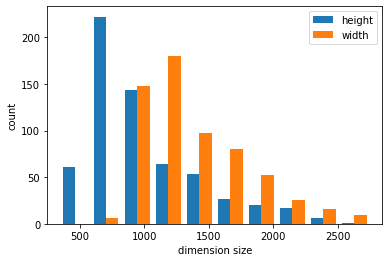

In [14]:
epa_dimensions = cx.dimensions_to_histo(target_directory)

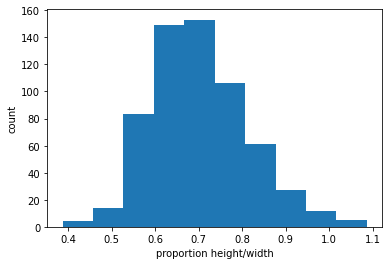

In [15]:
 epa_proportions = cx.proportions_ht_wt_to_histo(target_directory, 10)

In [16]:
# well I can see we have a varied bynch of images. Let's make them all the most common size
# print("Most common height", depflex.height.mean())
# print("Most common width", depflex.width.mean())
print("Most common height", deflep.height.mean())
print("Most common width", deflep.width.mean())
print("Most common proportion", deflep.proportion.mean())
if deflep.proportion.mean() == (deflep.height.mean()/deflep.width.mean()):
    print(
        """Most common proportion is actually the most common height over width.\n 
        Parameters for resize are obvious"""
    )
else:
    print("""Most common proportion are not actually the most common height over width.\n 
        Parameters for resize are not obvious"""
    )    
# define ta directory to be created
pathy = "D://resized_to_same_size3"
if os.path.exists(pathy):
    print("folder for this seems to exist")
else:    
    try:
        dir = os.path.join(pathy)
        if not os.path.exists(dir):
            os.mkdir(dir)
    except OSError:
        print ("Creation of the directory %s failed" % pathy)
    else:
        print ("Successfully created the directory %s " % pathy)
    

Most common height 991.1123778501628
Most common width 1373.7882736156353
Most common proportion 0.7034392325820282
Most common proportion are not actually the most common height over width.
 
        Parameters for resize are not obvious
folder for this seems to exist


In [17]:
original_files1 = glob.glob(os.path.join(origin_folder, '*.jpg'))
original_files2 = glob.glob(os.path.join(origin_folder, '*.jpeg'))
original_files = original_files1  + original_files2
target = 'D://resized_to_same_size3'

for f in original_files:
    shutil.copy(f, target)

In [18]:
# warning - this operation may take a relatively long time depending on number
#of images - coffee break time!
g = r'D://resized_to_same_size3'
count = 0
for file in os.listdir(g):
    f_img = g+"/"+file
    img = Image.open(f_img)
    img = img.resize((1388, 992))
    img.save(f_img)
    count += 1

In [34]:
# find hazy images, see how many and how bad 
found = cx.find_very_hazy(g)
percent_blurry = ((len(found[found.label_for_haze == 'hazy']))/count)
# If this is less than 2% of images I will just ignore
if percent_blurry*100 > 2:
    print("You have",
          percent_blurry*100,
          "percent images suspect for blurryness. Examine with found[found.label_for_haze == 'hazy']" 
    )
else:
    print ("You have",
        percent_blurry*100,
        "percent images suspect for blurryness. Less than 2% is probably good"
    )

You have 5.319750990379174 percent images suspect for blurryness. Examine with found[found.label_for_haze == 'hazy']


In [64]:
# let's make an average image of all (jpeg) trains from our original data
train_image_directory = 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'
#lotus = cx.avg_image(example_train_csv,'X_ray_image_name', 'Label',g)
lotus = cx.avg_image_maker((glob.glob(os.path.join(train_image_directory, '*.jpeg'))))


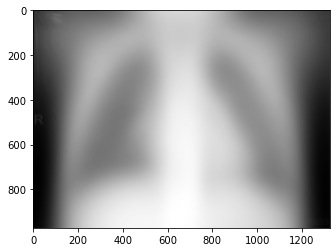

In [65]:
plt.imshow(lotus, cmap = 'gray')

In [59]:
# lets make averages of pathological versus non-path, or whatever our labels a re
lotus2 = cx.avg_image_maker_by_label(example_train_csv,'X_ray_image_name', 'Label',origin_folder)
lotus2

,name,images
0,Normal,"[[14306.75, 16104.1875, 16378.875, 16380.125, ..."
1,Pnemonia,"[[14596.3125, 16363.5, 16367.25, 16464.6875, 1..."


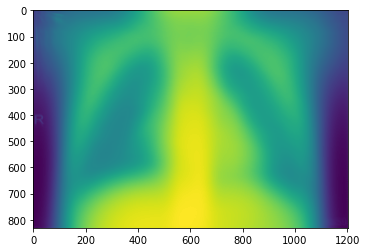

In [62]:
one = lotus2.images[1]
plt.imshow(one)

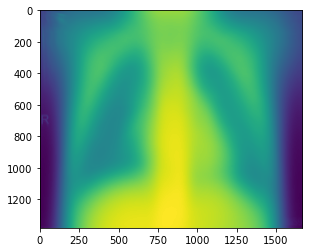

In [63]:
two = lotus2.images[0]
plt.imshow(two)

diff image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small ima

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_

example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)
example_small image (972, 1324)


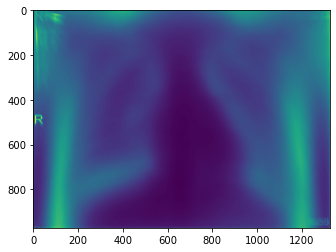

In [67]:
#OK, we can observe that in our original folder, the pathological images tended to be X-rayed with
# different proportions
# but shall we compare apples to apples, and see if there is much difference image to image?
all_apples = cx.set_image_variability(list_images)
plt.imshow(all_apples)

In [ ]:
# OK, hardly surprising we vary most  on where the big 'edges' are and in the lungs
# I guess they didn't tape the patients to exactly the same position down to the centimeter